In [1]:
#Locate the data, prepare for import of the MPT file
#Import necessary packaging
from utils.tools import *

In [2]:
path=r"C:\Users\cjang\Desktop\impedance_data\data\\"
data = ['DE_40_2_60.mpt']

No handles with labels found to put in legend.


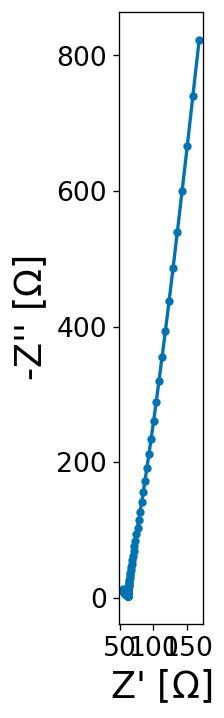

In [3]:
ex_mpt = mpt_data(path,data, mask = [1000018.6000000008, 125.84568999999996])
ex_mpt.set_new_gph_dims(15,15)
ex_mpt.mpt_plot()

In [4]:

Rs_guess = 40
R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2

ex_mpt.guesser(Rs_guess,R_guess,n_guess,fs_guess,R2_guess,n2_guess,fs2_guess)

ITERATION NO:  1
total error:  254807.90743351556
ITERATION NO:  2
total error:  -71561.77178840998
ITERATION NO:  3
total error:  -245933.6090017252
ITERATION NO:  4
total error:  -69295.83752639817
ITERATION NO:  5
total error:  -1724008.4539397717
ITERATION NO:  6
total error:  -0.00441712840482634
ITERATION NO:  7
total error:  4.6563641744293185e-10
ITERATION NO:  8
total error:  -4.656897098828373e-10
ITERATION NO:  9
total error:  4.6562931201557425e-10
ITERATION NO:  10
total error:-2115914.6344877635
ITERATION NO:  11
total error:  -0.0020420138063891756
ITERATION NO:  12
total error:  -9.313776408092912e-10
ITERATION NO:  13
total error:  -4.0856640987074755e-14


[47.5041353359616,
 13.976097859563472,
 1.189822575141834,
 0.002041786618262129,
 4256604.621095406,
 0.9125737972813472,
 2.9355281475459697e-06]

In [5]:
params = Parameters()

Rs_guess = 40
R_guess = 2959
n_guess = 0.8
fs_guess = 23023

R2_guess = 258738
n2_guess = 0.8
fs2_guess = 0.2

guess_package = [Rs_guess, R_guess, n_guess, fs_guess, R2_guess, n2_guess, fs2_guess]
#adding to the parameters package to send to the fitting function
params.add('Rs', value=guess_package[0], min=guess_package[0]*.01, max=guess_package[0]*100)
params.add('R', value=guess_package[1], min=guess_package[1]*.1, max=guess_package[1]*10)
params.add('n', value=guess_package[2], min=.65, max=1.2)
params.add('fs', value=guess_package[3], min=10**0.5, max=10**6)
params.add('R2', value=guess_package[4], min=guess_package[4]*.1, max=guess_package[4]*10)
params.add('n2', value=guess_package[5], min=.65, max=1.2)
params.add('fs2', value=guess_package[6], min=10**-2, max=10**1)

In [27]:
def leastsq_errorfunc(params, w, re, im, circuit, weight_func):
    if circuit == 'R-RQ-RQ':
            re_fit = cir_RsRQRQ_fit(params, w).real
            im_fit = -cir_RsRQRQ_fit(params, w).imag
    else:
        print('Circuit is not defined in leastsq_errorfunc()')
        
    error = [(re-re_fit)**2, (im-im_fit)**2] #sum of squares
    
    #Different Weighing options, see Lasia
    if weight_func == 'modulus':
        weight = [1/((re_fit**2 + im_fit**2)**(1/2)), 1/((re_fit**2 + im_fit**2)**(1/2))]
    elif weight_func == 'proportional':
        weight = [1/(re_fit**2), 1/(im_fit**2)]
    elif weight_func == 'unity':
        unity_1s = []
        for k in range(len(re)):
            unity_1s.append(1) #makes an array of [1]'s, so that the weighing is == 1 * sum of squres.
        weight = [unity_1s, unity_1s]
    else:
        print('weight not defined in leastsq_errorfunc()')
        
    S = np.array(weight) * error #weighted sum of squares 
    print(error)
    return S

In [28]:
leastsq_errorfunc(params, ex_mpt.df[0].w.values, ex_mpt.df[0].re.values, ex_mpt.df[0].im.values, circuit ='R-RQ-RQ', weight_func='modulus')

[array([1.29913773e+03, 1.69712581e+03, 2.12713847e+03, 2.66042542e+03,
       3.35655651e+03, 4.27424472e+03, 5.47757279e+03, 7.04791711e+03,
       9.09116322e+03, 1.17299285e+04, 1.51258957e+04, 1.94924739e+04,
       2.50760485e+04, 3.22070095e+04, 4.12792929e+04, 5.28269891e+04,
       6.74735853e+04, 8.59876880e+04, 1.09313693e+05, 1.38678421e+05,
       1.75376396e+05, 2.21064999e+05, 2.77645763e+05, 3.47170883e+05,
       4.31992705e+05, 5.34427141e+05, 6.57068057e+05, 8.02423816e+05,
       9.72074998e+05, 1.16827291e+06, 1.39150913e+06, 1.64138156e+06,
       1.91845519e+06, 2.21879548e+06, 2.54147747e+06, 2.87942019e+06,
       3.23215164e+06, 3.59212379e+06, 3.95280867e+06, 4.31329826e+06,
       4.66428768e+06, 5.00562341e+06, 5.33344305e+06, 5.64342975e+06,
       5.93777527e+06, 6.21154239e+06, 6.46486217e+06, 6.69994944e+06,
       6.91615732e+06, 7.11584690e+06, 7.29819138e+06, 7.46544905e+06,
       7.61900809e+06, 7.76007487e+06, 7.88960685e+06, 8.01044359e+06,
     

array([[   8.01365641,    9.66881845,   11.18196959,   12.89333018,
          14.98605299,   17.57032153,   20.72254787,   24.52874929,
          29.10007034,   34.52828414,   40.94467874,   48.52439389,
          57.41904624,   67.85363757,   80.05352628,   94.34202257,
         111.03714045,  130.5006815 ,  153.14771182,  179.51221927,
         210.02180575,  245.25481499,  285.79175825,  332.14266308,
         384.8587713 ,  444.32407439,  510.95848907,  585.03589654,
         666.32161604,  754.91719482,  850.15500436,  951.14842573,
        1057.52157418, 1167.34966252, 1280.04226831, 1393.07837791,
        1506.36405731, 1617.65425096, 1725.25968783, 1829.2766026 ,
        1927.43009076, 2020.12934159, 2106.71333307, 2186.46268839,
        2260.30457526, 2327.33522594, 2387.91877648, 2442.85521582,
        2492.22034392, 2536.75277675, 2576.44464025, 2611.94548102,
        2643.6729989 , 2671.98538656, 2697.17648705, 2719.87972941,
        2740.10216059, 2758.47404867, 2774.82126

In [29]:
minimize(leastsq_errorfunc, params, method='leastsq', args=(ex_mpt.df[0].w.values, ex_mpt.df[0].re.values, ex_mpt.df[0].im.values, circuit, weight_func), nan_policy=nan_policy, maxfev=9999990))

SyntaxError: invalid syntax (<ipython-input-29-1986c1fbc02f>, line 1)